<a href="https://colab.research.google.com/github/Khaled-Mohammed-Abdelgaber/deep-learning-projects-/blob/main/working_with_text_and_embedding_layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# tokenization on word level  

In [ ]:
import numpy as np 
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
token_index = {}
for sample in samples:
  for word in sample.split():
    if word not in token_index:
      token_index[word] = len(token_index) + 1
max_length = len(token_index)
results = np.zeros(shape = (len(samples),
                            max_length,
                            max(token_index.values())+1))
for i ,sample in enumerate(samples):
  for j , word in list(enumerate(sample.split()))[:max_length]:
    index = token_index.get(word)
    results[i,j,index] = 1.




In [ ]:
results

array([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0

# tokenization on character level

In [ ]:
import string
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
characters = string.printable # all characters that can be printed
token_index = dict(zip(range(1,len(characters)+1) , characters))
max_length = 50
results = np.zeros( shape = (len(samples) , max_length , max(token_index.keys())+1))
for i , sample in enumerate(samples):
  for j , char in enumerate(sample):
    index = token_index.get(char)
    results [i , j , index ] = 1.



# tokenization using keras built in functions

In [ ]:
from keras.preprocessing.text import Tokenizer
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
tokenizer = Tokenizer(num_words = 1000)  # the most popular 1000 words
tokenizer.fit_on_texts(samples)
sequence = tokenizer.texts_to_sequences(samples) #this convert text to list of indexes [[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]
on_hot_results = tokenizer.texts_to_matrix(samples,mode = 'binary') #return a matrix of two lists each on of 1000[which specified in num_words] length all values is zero except where word found
word_index = tokenizer.word_index # return a dictionary its keys is the words and its values is word index

print('Found %s unique tokens.' % len(word_index))

Found 9 unique tokens.


# tokenization using hash trick

In [ ]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
dimensionality = 1000

max_length = 10
results = np.zeros(shape = (len(samples ) , max_length , dimensionality))
for i ,sample in enumerate(samples):
  for j , word in list(enumerate(sample))[:max_length]:
    index = abs(hash(word)) % dimensionality
    
    results[i,j,index] = 1.


823
427
488
686
728
321
428
686
888
321
823
427
488
686
125
437
337
686
321
428


# word embedding

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [12]:
import requests
 
file_url = "http://mng.bz/0tIo"
    
r = requests.get(file_url, stream = True,verify = False) 
  
with open("/content/gdrive/My Drive/imdb.zip", "wb") as file: 
    for block in r.iter_content(chunk_size = 1024):
         if block: 
             file.write(block) 

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [13]:
!unzip '/content/gdrive/My Drive/imdb.zip' -d "/content/gdrive/MyDrive/Colab Notebooks/train/idbm"

Streaming output truncated to the last 5000 lines.
  inflating: /content/gdrive/MyDrive/Colab Notebooks/train/idbm/__MACOSX/aclImdb/train/pos/._7754_9.txt  
  inflating: /content/gdrive/MyDrive/Colab Notebooks/train/idbm/aclImdb/train/pos/7755_9.txt  
  inflating: /content/gdrive/MyDrive/Colab Notebooks/train/idbm/__MACOSX/aclImdb/train/pos/._7755_9.txt  
  inflating: /content/gdrive/MyDrive/Colab Notebooks/train/idbm/aclImdb/train/pos/7756_10.txt  
  inflating: /content/gdrive/MyDrive/Colab Notebooks/train/idbm/__MACOSX/aclImdb/train/pos/._7756_10.txt  
  inflating: /content/gdrive/MyDrive/Colab Notebooks/train/idbm/aclImdb/train/pos/7757_9.txt  
  inflating: /content/gdrive/MyDrive/Colab Notebooks/train/idbm/__MACOSX/aclImdb/train/pos/._7757_9.txt  
  inflating: /content/gdrive/MyDrive/Colab Notebooks/train/idbm/aclImdb/train/pos/7758_7.txt  
  inflating: /content/gdrive/MyDrive/Colab Notebooks/train/idbm/__MACOSX/aclImdb/train/pos/._7758_7.txt  
  inflating: /content/gdrive/MyDrive/

In [ ]:
from keras.datasets import imdb
from keras import preprocessing

max_features = 1000
max_length = 20
(x_train , y_train) , (x_test , y_test) = imdb.load_data(num_words=max_features)
x_train = preprocessing.sequence.pad_sequences(x_train , maxlen=max_length)
x_test = preprocessing.sequence.pad_sequences(x_test , maxlen=max_length)


17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
y_test

array([[0.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
# Our vectorized labels
import numpy as np
y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test = np.asarray(y_test).astype('float32').reshape((-1,1))

**Embedding(input_dim=1000,output_dim=8,input_length=max_length)**

**input_dim** : Size of the vocabulary

**output_dim** : Length of the vector for each word

**input_length** : Maximum length of a sequence

In [ ]:
from keras.models import Sequential
from keras.layers import Dense , Flatten ,Embedding
model = Sequential()
model.add(Embedding(1000,8,input_length = max_length))
model.add(Dense(1,activation = 'sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 8)             8000      
                                                                 
 dense (Dense)               (None, 20, 1)             9         
                                                                 
Total params: 8,009
Trainable params: 8,009
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#history = model.fit(x_train, y_train,epochs=10,batch_size=32,validation_split=0.2)
history = model.fit(x_train,
                    y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_test, y_test),
                    verbose=1)

Epoch 1/10
782/782 [==============================] - 3s 3ms/step - loss: 0.6850 - accuracy: 0.5419 - val_loss: 0.6802 - val_accuracy: 0.5440
Epoch 2/10
782/782 [==============================] - 2s 3ms/step - loss: 0.6787 - accuracy: 0.5479 - val_loss: 0.6792 - val_accuracy: 0.5470
Epoch 3/10
782/782 [==============================] - 2s 3ms/step - loss: 0.6782 - accuracy: 0.5484 - val_loss: 0.6791 - val_accuracy: 0.5459
Epoch 4/10
782/782 [==============================] - 2s 3ms/step - loss: 0.6779 - accuracy: 0.5495 - val_loss: 0.6792 - val_accuracy: 0.5474
Epoch 5/10
782/782 [==============================] - 2s 3ms/step - loss: 0.6778 - accuracy: 0.5499 - val_loss: 0.6792 - val_accuracy: 0.5448
Epoch 6/10
782/782 [==============================] - 2s 3ms/step - loss: 0.6777 - accuracy: 0.5493 - val_loss: 0.6790 - val_accuracy: 0.5457
Epoch 7/10
782/782 [==============================] - 3s 3ms/step - loss: 0.6776 - accuracy: 0.5494 - val_loss: 0.6791 - val_accuracy: 0.5476
Epoch 

In [15]:
import os
imdb_dir = '/content/gdrive/MyDrive/Colab Notebooks/train/idbm/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')
labels = []
texts = []
for label_type in ['neg', 'pos']:
  dir_name = os.path.join(train_dir, label_type)
  for fname in os.listdir(dir_name):
    if fname[-4:] == '.txt':
      f = open(os.path.join(dir_name, fname))
      texts.append(f.read())
      f.close()
      if label_type == 'neg':
        labels.append(0)
      else:
        labels.append(1)

In [19]:
texts[0],labels[0]

("Story of a man who has unnatural feelings for a pig. Starts out with a opening scene that is a terrific example of absurd comedy. A formal orchestra audience is turned into an insane, violent mob by the crazy chantings of it's singers. Unfortunately it stays absurd the WHOLE time with no general narrative eventually making it just too off putting. Even those from the era should be turned off. The cryptic dialogue would make Shakespeare seem easy to a third grader. On a technical level it's better than you might think with some good cinematography by future great Vilmos Zsigmond. Future stars Sally Kirkland and Frederic Forrest can be seen briefly.",
 0)

In [25]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np 
max_len = 100 #we will take first 100 word of reviews
training_samples = 200  # trains on 200 sample
validation_samples = 10000 # validation on 10,000
max_words = 10000 #consider only the top 10000 of datasets
tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(texts)

sequences = tokenizer.texts_to_sequences(texts)


In [27]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 88582 unique tokens.


In [28]:
data = pad_sequences(sequences,max_len) #pading all sequences to 100 and store it in data

In [29]:
labels = np.asarray(labels) # convert labels from list to numpy array

In [30]:
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


In [32]:
#just to shuffle data and make sure labels and data suffles at the same sequence
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

In [33]:
# data variable contains all datasets now we want only 200 sample for training 
# and 10000 for validation
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

In [34]:
# to download pretrained glove
import requests
 
file_url = "https://nlp.stanford.edu/data/glove.6B.zip"
    
r = requests.get(file_url, stream = True,verify = False) 
  
with open("/content/gdrive/My Drive/glove.6B.zip", "wb") as file: 
    for block in r.iter_content(chunk_size = 1024):
         if block: 
             file.write(block) 

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [35]:
!unzip '/content/gdrive/My Drive/glove.6B.zip' -d "/content/gdrive/My Drive/glove6B"

Archive:  /content/gdrive/My Drive/glove.6B.zip
  inflating: /content/gdrive/My Drive/glove6B/glove.6B.50d.txt  
  inflating: /content/gdrive/My Drive/glove6B/glove.6B.100d.txt  
  inflating: /content/gdrive/My Drive/glove6B/glove.6B.200d.txt  
  inflating: /content/gdrive/My Drive/glove6B/glove.6B.300d.txt  


In [36]:
glove_dir = '/content/gdrive/My Drive/glove6B'
embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


#Preparing the GloVe word-embeddings matrix

In [37]:
embeding_dim = 100
embeding_matrix = np.zeros((max_words , embeding_dim))
for word, i in word_index.items():
  if i < max_words:
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
      embeding_matrix[i] = embedding_vector # embeding matrix represent embedding_layer weights

In [40]:
embeding_matrix[1]

array([-0.038194  , -0.24487001,  0.72812003, -0.39961001,  0.083172  ,
        0.043953  , -0.39140999,  0.3344    , -0.57545   ,  0.087459  ,
        0.28786999, -0.06731   ,  0.30906001, -0.26383999, -0.13231   ,
       -0.20757   ,  0.33395001, -0.33848   , -0.31742999, -0.48335999,
        0.1464    , -0.37303999,  0.34577   ,  0.052041  ,  0.44946   ,
       -0.46970999,  0.02628   , -0.54154998, -0.15518001, -0.14106999,
       -0.039722  ,  0.28277001,  0.14393   ,  0.23464   , -0.31020999,
        0.086173  ,  0.20397   ,  0.52623999,  0.17163999, -0.082378  ,
       -0.71787   , -0.41531   ,  0.20334999, -0.12763   ,  0.41367   ,
        0.55186999,  0.57907999, -0.33476999, -0.36559001, -0.54856998,
       -0.062892  ,  0.26583999,  0.30204999,  0.99774998, -0.80480999,
       -3.0243001 ,  0.01254   , -0.36941999,  2.21670008,  0.72201002,
       -0.24978   ,  0.92136002,  0.034514  ,  0.46744999,  1.10790002,
       -0.19358   , -0.074575  ,  0.23353   , -0.052062  , -0.22

#Model definion

In [43]:
model = Sequential()
model.add(Embedding(max_words, embeding_dim, input_length=max_len))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense_1 (Dense)             (None, 32)                320032    
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


# Loading pretrained word embeddings into the Embedding layer

In [44]:
model.layers[0].set_weights([embeding_matrix]) #load weights to first layer which is embedding layer
model.layers[0].trainable = False #freeze weights of embedding layer

#Training and evaluation

In [45]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('/content/gdrive/MyDrive/Colab Notebooks/pre_trained_glove_model.h5')

Epoch 1/10
7/7 [==============================] - 2s 243ms/step - loss: 1.7756 - acc: 0.5250 - val_loss: 0.6935 - val_acc: 0.5352
Epoch 2/10
7/7 [==============================] - 1s 128ms/step - loss: 0.5933 - acc: 0.7300 - val_loss: 0.9223 - val_acc: 0.5029
Epoch 3/10
7/7 [==============================] - 1s 220ms/step - loss: 0.4968 - acc: 0.7100 - val_loss: 0.6840 - val_acc: 0.5690
Epoch 4/10
7/7 [==============================] - 1s 220ms/step - loss: 0.3755 - acc: 0.8050 - val_loss: 1.1839 - val_acc: 0.5034
Epoch 5/10
7/7 [==============================] - 1s 159ms/step - loss: 0.3922 - acc: 0.7950 - val_loss: 0.8415 - val_acc: 0.5357
Epoch 6/10
7/7 [==============================] - 1s 166ms/step - loss: 0.1736 - acc: 0.9350 - val_loss: 2.4269 - val_acc: 0.5023
Epoch 7/10
7/7 [==============================] - 1s 223ms/step - loss: 0.3761 - acc: 0.8400 - val_loss: 0.7435 - val_acc: 0.5783
Epoch 8/10
7/7 [==============================] - 1s 138ms/step - loss: 0.0488 - acc: 1.00

#Plotting the results

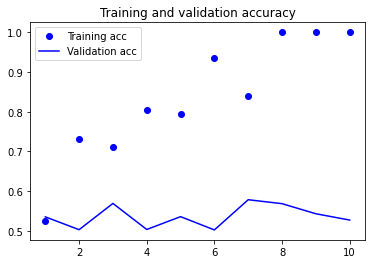

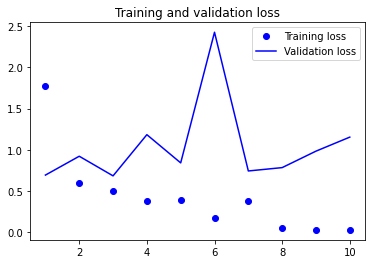

In [46]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

#Training the same model without loading pretrained weights

In [47]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
model = Sequential()
model.add(Embedding(max_words, embeding_dim, input_length=max_len))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 flatten_1 (Flatten)         (None, 10000)             0         
                                                                 
 dense_3 (Dense)             (None, 32)                320032    
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
7/7 [==============================] - 2s 144ms/step - loss: 0.6959 - acc: 0.4800 - val_loss: 0.6936 - val_acc: 0.5121
Epoch 2/10
7/7 [==============================

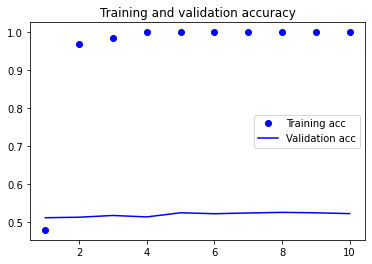

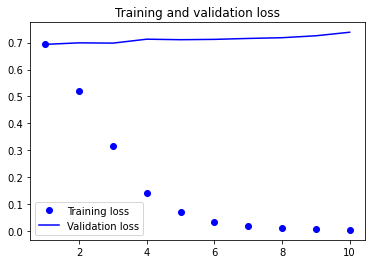

In [48]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [53]:
test_dir = os.path.join(imdb_dir,"test")
test_labels = []
test_texts = []
for label_type in ['neg','pos']:
  dir = os.path.join(test_dir,label_type)
  
  for file in sorted(os.listdir(dir)):
    if file[-4:] == '.txt':
      f = open(os.path.join(dir , file))
      test_texts.append(f.read())
      f.close()
    if label_type == 'neg':
      test_labels.append(0)
    else:
      test_labels.append(1)


In [54]:
sequences = tokenizer.texts_to_sequences(texts)#convert text to sequences
x_test = pad_sequences(sequences , max_len) # pad all sequences to 100 length
y_test = np.asarray(test_labels) #convert y_test from list to np array

In [60]:
len(sequences[0]),len(sequences[5])

(104, 87)

# model evaluating and loading

In [55]:
model.load_weights('/content/gdrive/MyDrive/Colab Notebooks/pre_trained_glove_model.h5') #load model from where its stored
model.evaluate(x_test,y_test)

782/782 [==============================] - 2s 3ms/step - loss: 1.1523 - acc: 0.5318


[1.1523494720458984, 0.5317999720573425]